In [4]:
pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 9.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
import os
import numpy as np
import pandas as pd

# ML toolkits
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.utils.extmath import density
from sklearn.pipeline import make_pipeline

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix

In [8]:
real=pd.read_csv("True.csv",encoding='iso-8859-1')
fake=pd.read_csv("Fake.csv",encoding='iso-8859-1')

In [9]:
#Displaying Fake.csv dataset

fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamaâs Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [10]:
#Displaying real.csv dataset

real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [11]:
#summary of the Dataset
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [12]:
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [13]:
#Counting unique values

fake.subject.value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [14]:
real.subject.value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [15]:
#Assigning New labels

fake['label'] = 'fake'
real['label'] = 'real'

In [16]:
#Concatenation
data = pd.concat([fake, real], axis=0)
data = data.sample(frac=1).reset_index(drop=True)
data.drop('subject', axis=1)

,title,text,date,label
0,Trump says he trusts Putin's denials of electi...,"DANANG, Vietnam (Reuters) - President Donald T...","November 11, 2017",real
1,ZING! KELLYANNE CONWAY Mocks CNNâs Obsession...,Kellyanne Conway was trying to discuss the acc...,"Jun 24, 2017",fake
2,"Putin, Trump speak by phone, aim for cooperati...",MOSCOW (Reuters) - Russian President Vladimir ...,"November 14, 2016",real
3,Chelsea Handler Gets The Last Word After RNC ...,There may be a few women out there who enjoy a...,"September 19, 2016",fake
4,John McCainâs Son Really Hates Ignorant Rac...,After racists threw a temper tantrum over Old ...,"May 4, 2016",fake
...,...,...,...,...
44893,Republican Official Caught Exposing Himself A...,Republicans always like to claim they are the ...,"July 24, 2017",fake
44894,GOP HOUSE LEADERSHIP Place Political Careers B...,Is this why we worked so hard to get a GOP maj...,"Dec 2, 2015",fake
44895,"'We appoint our ambassadors', says UK PM's spo...",LONDON (Reuters) - Britain has an âincredibl...,"November 22, 2016",real
44896,"U.N. chief Guterres condemns racism, xenophobi...",UNITED NATIONS (Reuters) - United Nations Secr...,"August 15, 2017",real


In [17]:
# Train and Test
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.25)
display(X_train.head())
print('\n')
display(y_train.head())

print("\nThere are {} documents in the training data.".format(len(X_train)))

40595    MEXICO CITY (Reuters) - An indigenous woman ba...
43546    The Republican civil war is heating up as memb...
39712     I think this is hope over reality longtime De...
15368    CANBERRA (Reuters) - Australia s High Court ru...
11791    You just can t make this stuff up Yet another ...
Name: text, dtype: object

40595    real
43546    fake
39712    fake
15368    real
11791    fake
Name: label, dtype: object


There are 33673 documents in the training data.


In [18]:
my_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

# fit the vectorizer and transform X_train into a tf-idf matrix,
# then use the same vectorizer to transform X_test
tfidf_train = my_tfidf.fit_transform(X_train)
tfidf_test = my_tfidf.transform(X_test)

tfidf_train

<33673x114149 sparse matrix of type '<class 'numpy.float64'>'
	with 5168222 stored elements in Compressed Sparse Row format>

In [19]:
#model
from sklearn.linear_model import PassiveAggressiveClassifier
pa_clf = PassiveAggressiveClassifier(max_iter=50)
pa_clf.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

The accuracy of prediction is 99.63%.

The F1 score is 0.996.



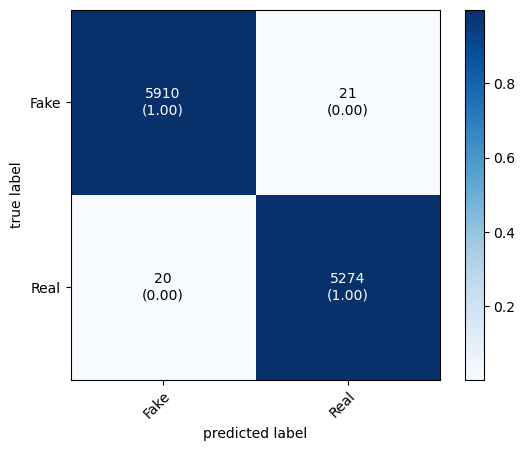

In [20]:
y_pred = pa_clf.predict(tfidf_test)

conf_mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat,
                      show_normed=True, colorbar=True,
                      class_names=['Fake', 'Real'])

accscore = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test,y_pred,pos_label='real')

print('The accuracy of prediction is {:.2f}%.\n'.format(accscore*100))
print('The F1 score is {:.3f}.\n'.format(f1score))

In [21]:
# Dimensionality and density of features

print("Dimensionality (i.e., number of features): {:d}".format(pa_clf.coef_.shape[1]))
print("Density (i.e., fraction of non-zero elements): {:.3f}".format(density(pa_clf.coef_)))

Dimensionality (i.e., number of features): 114149
Density (i.e., fraction of non-zero elements): 0.492


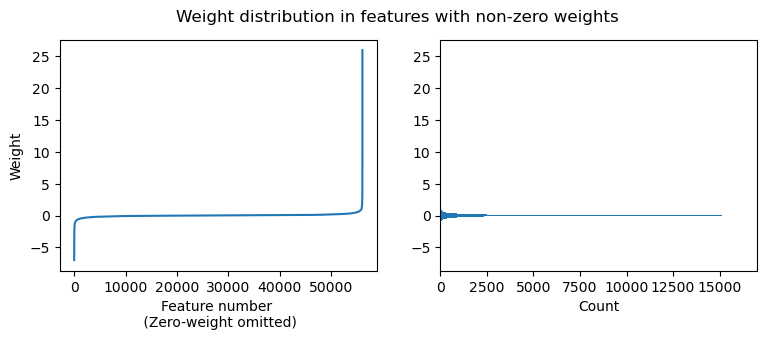

In [22]:
# Sort non-zero weights
weights_nonzero = pa_clf.coef_[pa_clf.coef_!=0]
feature_sorter_nonzero = np.argsort(weights_nonzero)
weights_nonzero_sorted =weights_nonzero[feature_sorter_nonzero]

# Plot
fig, axs = plt.subplots(1,2, figsize=(9,3))

sns.lineplot(data=weights_nonzero_sorted, ax=axs[0])
axs[0].set_ylabel('Weight')
axs[0].set_xlabel('Feature number \n (Zero-weight omitted)')

axs[1].hist(weights_nonzero_sorted,
            orientation='horizontal', bins=500,)
axs[1].set_xlabel('Count')

fig.suptitle('Weight distribution in features with non-zero weights')

plt.show()